# Climate Data Visualization
This was an assignment part of the Applied Plotting, Charting & Data Representation in Python course
part of the Coursera Applied Data Science with Python Specialization. Students were given data from 
The National Centers for Environmental Information (NCEI) [Global Historical Climatology Network daily (GHCNd)](https://www.ncei.noaa.gov/products/land-based-station/global-historical-climatology-network-daily). The specific subset that 
was used was data recorded in Ann Arbor, MI from 2005 to 2015. The goal of this assignment was to 
create a figure that represents this data according to certain specifications. All time annual minimum
and maximum temperatures between 2005 and 2014 are to be represented by a line graph. All values 
in 2015 that broke the records represented in the line graphs are to be scatter plotted on the same 
figure. The resulting visual abides by Alberto Cairo's principles to create a well rounded figure. 

## Data Cleaning

In [2]:
import pandas as pd
# import climate data from Ann Arbor, MI
df = pd.read_csv('assets/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

# make a column for the data in celcius 
df['C'] = df['Data_Value'].apply(lambda x: (x-32)*5/9)
df.rename(columns={'Data_Value': 'F'}, inplace=True)

# make two dataframes. one for minimum temperatures, and one for maximum
min_temp = df.loc[df['Element'] == 'TMIN']
max_temp = df.loc[df['Element'] == 'TMAX']

# create columns for date attributes
min_temp['year'] = pd.DatetimeIndex(min_temp['Date']).year
min_temp['month'] = pd.DatetimeIndex(min_temp['Date']).month
min_temp['day'] = pd.DatetimeIndex(min_temp['Date']).day

max_temp['year'] = pd.DatetimeIndex(max_temp['Date']).year
max_temp['month'] = pd.DatetimeIndex(max_temp['Date']).month
max_temp['day'] = pd.DatetimeIndex(max_temp['Date']).day

# drop leap year (Feb 29) from df
min_leap = min_temp[(min_temp['month'] == 2) & (min_temp['day'] == 29)]
min_temp.drop(min_leap.index, inplace=True)

max_leap = max_temp[(max_temp['month'] == 2) & (max_temp['day'] == 29)]
max_temp.drop(max_leap.index, inplace=True)

# make grouped dataframes 
min_temp_by_year = min_temp.groupby(['year', 'month', 'day'], as_index=False)['C'].min()
max_temp_by_year = max_temp.groupby(['year', 'month', 'day'], as_index=False)['C'].max()

# here are the min and max temps for each day of the year between 2005-2015
df_2005_2014_min = min_temp_by_year.loc[min_temp_by_year['year'] != 2015]
min_temp_day = df_2005_2014_min.groupby(['month', 'day'], as_index=False)['C'].min()
min_temp_day.reset_index(inplace=True)
min_temp_day.drop(columns='index', inplace=True)
df_2005_2014_max = max_temp_by_year.loc[max_temp_by_year['year'] != 2015]
max_temp_day = df_2005_2014_max.groupby(['month', 'day'], as_index=False)['C'].max()
max_temp_day.reset_index(inplace=True)
max_temp_day.drop(columns='index', inplace=True)

# similarly, here are the min and max temps for each day in 2015 
min_temp_2015 = min_temp_by_year.loc[min_temp_by_year['year'] == 2015]
min_temp_2015.reset_index(inplace=True)
min_temp_2015.drop(columns='index', inplace=True)
max_temp_2015 = max_temp_by_year.loc[max_temp_by_year['year'] == 2015]
max_temp_2015.reset_index(inplace=True)
max_temp_2015.drop(columns='index', inplace=True)


<ipython-input-2-6cdf7b6c0d0c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  min_temp['year'] = pd.DatetimeIndex(min_temp['Date']).year
<ipython-input-2-6cdf7b6c0d0c>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  min_temp['month'] = pd.DatetimeIndex(min_temp['Date']).month
<ipython-input-2-6cdf7b6c0d0c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

## Plotting

RangeIndex(start=0, stop=365, step=1)


<ipython-input-3-07d03d32d3d1>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  min_temp_2015['2005-2014'] = min_temp_day['C']
<ipython-input-3-07d03d32d3d1>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  max_temp_2015['2005-2014'] = max_temp_day['C']


Text(0.5, 1.0, 'Temperature trends in Ann Arbor, Michigan from 2005 to 2015')

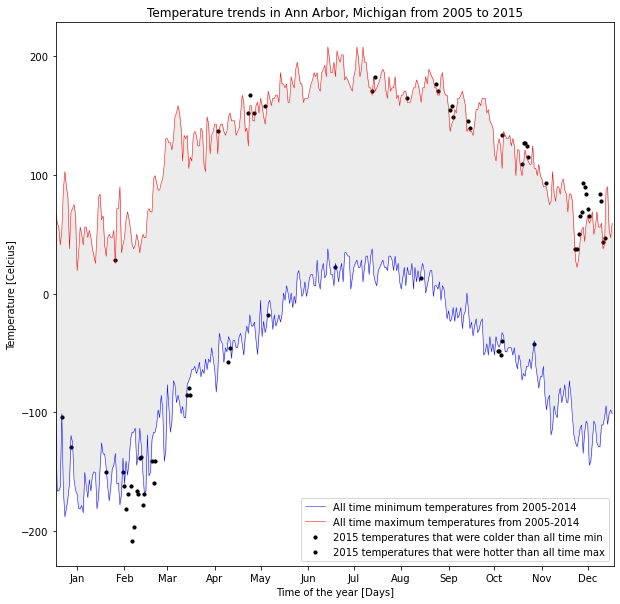

In [3]:
import matplotlib.pyplot as plt
from calendar import month_abbr
import matplotlib.dates as mdates

# create series out of each of the dataframes
min_temps_ser = pd.Series(min_temp_day['C'])
max_temps_ser = pd.Series(max_temp_day['C'])

# only keep 2015 values that are less than the all time mins OR greater than the all time maxes
min_temp_2015['2005-2014'] = min_temp_day['C']
min_temp_2015 = min_temp_2015.loc[min_temp_2015['C'] < min_temp_2015['2005-2014']]

max_temp_2015['2005-2014'] = max_temp_day['C']
max_temp_2015 = max_temp_2015.loc[max_temp_2015['C'] > max_temp_2015['2005-2014']]
# line plot all time mins and max
plt.figure(figsize=(10, 10))
plt.plot(min_temps_ser, '-b', label='All time minimum temperatures from 2005-2014', linewidth=0.5)
plt.plot(max_temps_ser, '-r', label='All time maximum temperatures from 2005-2014', linewidth=0.5)
# fill area between plots
print(min_temps_ser.index)
plt.fill_between(min_temps_ser.index, min_temps_ser, max_temps_ser, color='gray', alpha=0.15)
# plot 2015 values that are less than the all time mins OR greater than the all time maxes
min_x = min_temp_2015.index
min_y = min_temp_2015['C']
plt.scatter(min_x, min_y, s=10, c='black', label='2015 temperatures that were colder than all time min')
max_x = max_temp_2015.index
max_y = max_temp_2015['C']
plt.scatter(max_x, max_y, s=10, c='black', label='2015 temperatures that were hotter than all time max')
# add legend
plt.legend()
# making x-axis into months
locator = mdates.MonthLocator(bymonthday=15)
plt.gca().xaxis.set_major_locator(locator)
formatter = mdates.DateFormatter('%b')
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().set_xlim(0, 365)
# set x, y labels
plt.xlabel('Time of the year [Days]')
plt.ylabel('Temperature [Celcius]')
# set title
plt.title('Temperature trends in Ann Arbor, Michigan from 2005 to 2015')